# Q1: What is the albedo of polygonal tundra? 

### Q1 - What is the growing season albedo of a polygonal tundra landscape? 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tram_data = pd.read_csv("data/tram_complete.csv")
tram_data = tram_data[tram_data['Albedo'] != -9999]
tram_data = tram_data[tram_data['Albedo'] <= 0.95]
tram_data = tram_data[tram_data['ShortW_inc'] >= 25]
tram_data = tram_data[tram_data['NDVI'] != -9999]
tram_data['date'] = pd.to_datetime(tram_data['date'])

In [4]:
len(tram_data[tram_data['Year'] == 2014])

43692

In [5]:
tram_2014 = tram_data[tram_data['Year'] == 2014]
tram_2015 = tram_data[tram_data['Year'] == 2015]
tram_2016 = tram_data[tram_data['Year'] == 2016]
tram_2017 = tram_data[tram_data['Year'] == 2017]

In [66]:
tram_2014.describe()

,Unnamed: 0,Year,Month,Day_of_Month,Hour,Minute,Second,DD_AKST,DD_Expected_AKST,Offset_time,...,Red_i,NIR_i,Red_r,NIR_r,NDVI,T_air_C,T_surf_C,veg_type,date,DOY
count,43692.000000,43692.0,43692.000000,43692.000000,43692.000000,43692.000000,43692.000000,43692.000000,43692.000000,43692.000000,...,43692.000000,43692.000000,43692.000000,43692.000000,43692.000000,43692.000000,43692.000000,0.0,43692,43692.000000
mean,26412.868489,2014.0,7.433420,14.267806,12.698984,25.096974,29.268424,209.489398,209.487210,0.052434,...,-149.828906,-255.287972,-1.271826,-3.230518,0.301050,2.513892,3.605523,NaN,2014-07-27 22:37:12.573468672,208.942507
min,1.000000,2014.0,5.000000,1.000000,0.000000,0.000000,0.000000,147.959370,147.958330,-2.388611,...,-693.705000,-1210.212000,-18.448000,-32.035000,-0.623000,-7.143000,-7.195000,NaN,2014-05-27 00:00:00,147.000000
25%,12297.750000,2014.0,7.000000,8.000000,9.000000,11.000000,14.000000,183.002833,183.001905,0.012924,...,-217.537500,-364.482000,-1.041000,-4.073250,0.237000,0.567000,0.939750,NaN,2014-07-02 00:00:00,183.000000
50%,24807.500000,2014.0,8.000000,13.000000,13.000000,21.000000,29.000000,213.469035,213.462320,0.020964,...,-120.083000,-209.517000,-0.402000,-1.941500,0.374000,2.258000,3.117000,NaN,2014-08-01 00:00:00,213.000000
75%,39649.250000,2014.0,8.000000,21.000000,17.000000,39.000000,44.000000,241.481853,241.481535,0.041123,...,-63.565750,-113.105250,-0.164000,-0.934000,0.458000,3.667000,5.633000,NaN,2014-08-29 00:00:00,241.000000
max,59316.000000,2014.0,9.000000,31.000000,23.000000,59.000000,59.000000,270.392870,270.388350,1.950867,...,-15.378000,-21.058000,-0.013000,-0.049000,0.816000,15.478000,20.840000,NaN,2014-09-27 00:00:00,270.000000
std,16536.216497,0.0,1.178428,8.386382,4.328363,17.074097,17.296659,36.003330,36.003658,0.295048,...,107.551172,178.410608,2.336386,3.762913,0.234061,3.542482,4.176631,NaN,NaN,36.004029


In [6]:
len(tram_2014)+len(tram_2015)+len(tram_2016)+len(tram_2017)
len(tram_2014)

43692

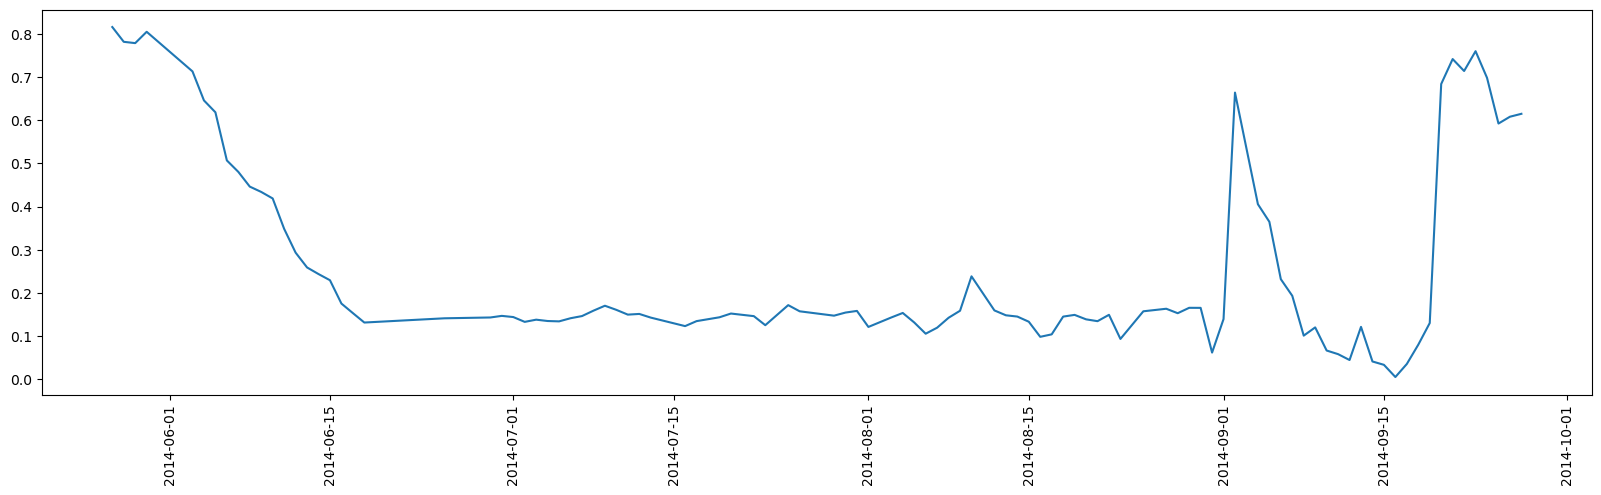

In [7]:
tram_data_2014 = tram_data[tram_data['Year'] == 2014]
daily_albedo_2014 = tram_data_2014.groupby(by=['date'])['Albedo'].mean().reset_index()

plt.figure(figsize=(20, 5))
plt.plot(daily_albedo_2014['date'], daily_albedo_2014['Albedo'])
plt.xticks(rotation=90)
plt.show()

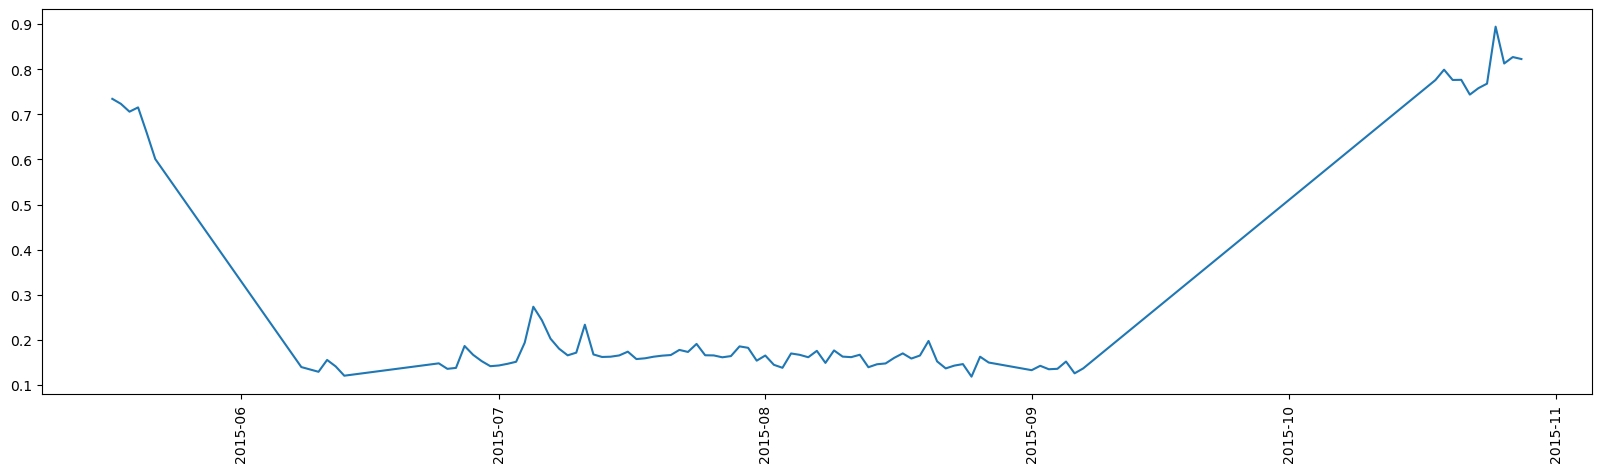

In [8]:
daily_albedo_2015 = tram_2015.groupby(by=['date'])['Albedo'].mean().reset_index()

plt.figure(figsize=(20, 5))
plt.plot(daily_albedo_2015['date'], daily_albedo_2015['Albedo'])
plt.xticks(rotation=90)
plt.show()

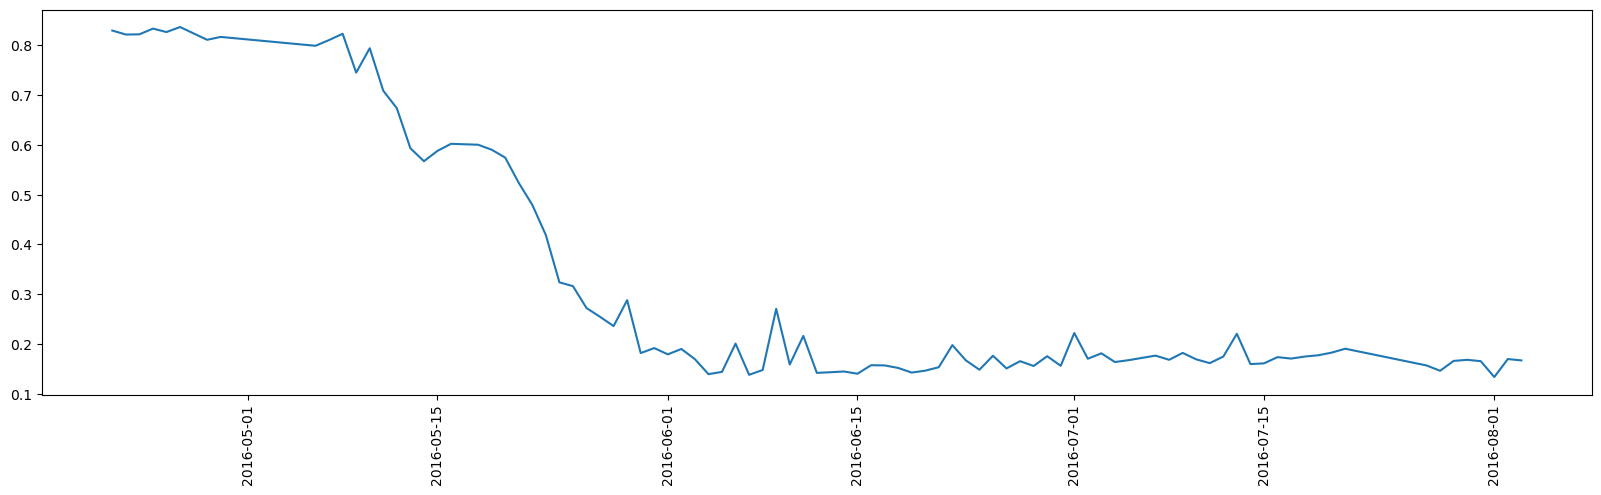

In [9]:
daily_albedo_2016 = tram_2016.groupby(by=['date'])['Albedo'].mean().reset_index()

plt.figure(figsize=(20, 5))
plt.plot(daily_albedo_2016['date'], daily_albedo_2016['Albedo'])
plt.xticks(rotation=90)
plt.show()

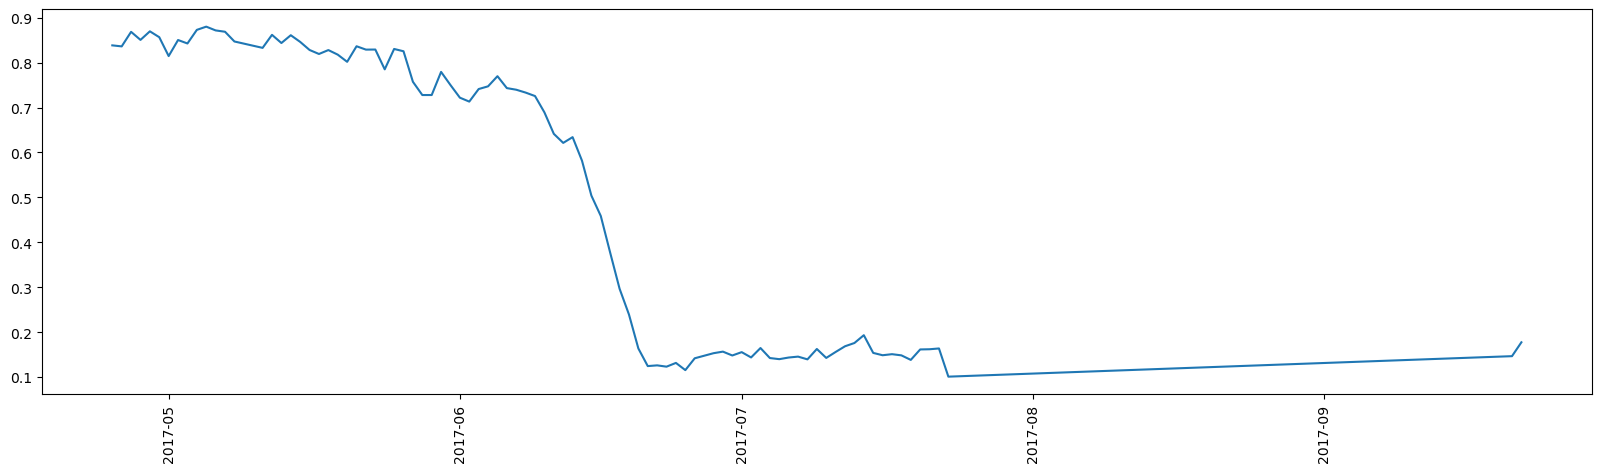

In [10]:
daily_albedo_2017 = tram_2017.groupby(by=['date'])['Albedo'].mean().reset_index()

plt.figure(figsize=(20, 5))
plt.plot(daily_albedo_2017['date'], daily_albedo_2017['Albedo'])
plt.xticks(rotation=90)
plt.show()

## Spring Snow Albedo

Spring snow defined on the tram as:
- 2014: May 27 - May 30
- 2016: April 21 - May 10, 
- 2017: April 25 - May 26 


In [11]:
tram_data[((tram_data['date'] >= '2014-05-27') & (tram_data['date'] <= '2014-05-30')) | 
          ((tram_data['date'] >= '2016-04-21') & (tram_data['date'] <= '2016-05-10'))| 
          ((tram_data['date'] >= '2017-04-25') & (tram_data['date'] <= '2017-05-26'))][['Albedo', 'NDVI']].describe()

,Albedo,NDVI
count,17015.000000,17015.000000
mean,0.829117,-0.112455
std,0.035315,0.015634
min,0.608000,-0.515000
25%,0.810000,-0.118000
50%,0.831000,-0.110000
75%,0.850000,-0.104000
max,0.950000,0.024000


In [12]:
tram_data[tram_data['Albedo'] >= 0.9][['ShortW_inc', 'ShortW_out', 'Hour', 'Month']].describe()

,ShortW_inc,ShortW_out,Hour,Month
count,421.000000,421.000000,421.000000,421.000000
mean,365.527736,335.332594,11.090261,5.047506
std,196.721005,180.911770,3.714377,1.495270
min,25.018000,22.747000,5.000000,4.000000
25%,255.219000,231.294000,8.000000,4.000000
50%,381.691000,345.861000,11.000000,5.000000
75%,528.560000,485.173000,14.000000,5.000000
max,728.386000,683.272000,23.000000,10.000000


# Comparing Jovan Data to NGEE Data

In [25]:
jovan_2014 = pd.read_csv("/Users/colettebrown/Library/CloudStorage/GoogleDrive-coletteb@berkeley.edu/Shared drives/Tram/tableau/Old_tableau_plots_and_data/completeruns_fixed_2014.csv")
jovan_2015 = pd.read_csv("/Users/colettebrown/Library/CloudStorage/GoogleDrive-coletteb@berkeley.edu/Shared drives/Tram/tableau/Old_tableau_plots_and_data/completeruns_fixed_2015.csv")
jovan_2016 = pd.read_csv("/Users/colettebrown/Library/CloudStorage/GoogleDrive-coletteb@berkeley.edu/Shared drives/Tram/tableau/Old_tableau_plots_and_data/completeruns_fixed_2016.csv")
jovan_2017 = pd.read_csv("/Users/colettebrown/Library/CloudStorage/GoogleDrive-coletteb@berkeley.edu/Shared drives/Tram/tableau/Old_tableau_plots_and_data/completeruns_fixed_2017.csv")


jovan_concat = pd.concat([jovan_2014, jovan_2015, jovan_2016, jovan_2017])
jovan_concat = jovan_concat[jovan_concat['NDVI'] != -9999]
jovan_concat = jovan_concat[jovan_concat['Albedo'] != -9999]
jovan_concat['DateTime'] = pd.to_datetime(jovan_concat['DateTime'])

In [26]:
jovan_concat[((jovan_concat['DateTime'] >= '2014-05-27') & (jovan_concat['DateTime'] <= '2014-05-30')) | 
          ((jovan_concat['DateTime'] >= '2016-04-21') & (jovan_concat['DateTime'] <= '2016-05-10'))| 
          ((jovan_concat['DateTime'] >= '2017-04-25') & (jovan_concat['DateTime'] <= '2017-05-26'))][['Albedo', 'NDVI']].describe()

,Albedo,NDVI
count,5433.000000,5286.000000
mean,0.807104,-0.112884
std,0.050105,0.013337
min,0.608000,-0.353000
25%,0.783000,-0.118000
50%,0.808000,-0.111000
75%,0.828000,-0.106000
max,1.341000,0.008000


In [15]:
filtered_df = jovan_concat[((jovan_concat['DateTime'] >= '2014-05-27') & (jovan_concat['DateTime'] <= '2014-05-30')) | 
          ((jovan_concat['DateTime'] >= '2016-04-21') & (jovan_concat['DateTime'] <= '2016-05-10'))| 
          ((jovan_concat['DateTime'] >= '2017-04-25') & (jovan_concat['DateTime'] <= '2017-05-26'))]

In [16]:
tram_filtered = tram_data[((tram_data['date'] >= '2014-05-27') & (tram_data['date'] <= '2014-05-30')) | 
          ((tram_data['date'] >= '2016-04-21') & (tram_data['date'] <= '2016-05-10'))| 
          ((tram_data['date'] >= '2017-04-25') & (tram_data['date'] <= '2017-05-26'))]

In [17]:
filtered_df[['Run_number', 'Stop_number', 'ShortW_inc', 'ShortW_out', 'Albedo', 'T_air_C', 'T_surf_C']].describe()

,Run_number,Stop_number,ShortW_inc,ShortW_out,Albedo,T_air_C,T_surf_C
count,7183.000000,7183.000000,7183.000000,7183.000000,5433.000000,7183.000000,7183.000000
mean,15.043993,68.306836,232.079714,186.358288,0.807104,-5.961021,-6.328828
std,9.573835,39.190421,201.847980,160.890397,0.050105,2.465444,2.773460
min,1.000000,1.000000,-2.606000,-0.210000,0.608000,-11.916000,-15.360000
25%,7.000000,34.000000,26.489000,22.079000,0.783000,-7.136000,-8.280000
50%,14.000000,68.000000,238.496000,194.914000,0.808000,-6.050000,-6.323000
75%,22.000000,102.000000,368.589000,295.811000,0.828000,-4.712000,-4.125500
max,35.000000,136.000000,870.800000,674.181000,1.341000,1.966000,0.014000


In [18]:
tram_filtered[['Run_number', 'Stop_number', 'ShortW_inc', 'ShortW_out', 'Albedo', 'T_air_C', 'T_surf_C']].describe()

,Run_number,Stop_number,ShortW_inc,ShortW_out,Albedo,T_air_C,T_surf_C
count,17015.000000,17015.000000,17015.000000,17015.000000,17015.000000,17015.000000,17015.000000
mean,37.212166,68.703203,395.248739,328.024368,0.829117,-5.794619,-6.097346
std,27.467728,39.307377,165.630204,137.621226,0.035315,4.408411,4.165725
min,1.000000,1.000000,25.029000,18.754000,0.608000,-17.031000,-19.610000
25%,14.000000,35.000000,279.670500,230.919500,0.810000,-8.431500,-8.570000
50%,30.000000,69.000000,402.758000,339.320000,0.831000,-5.691000,-5.689000
75%,61.000000,103.000000,516.909000,425.546000,0.850000,-2.481000,-2.869000
max,92.000000,136.000000,1026.685000,853.439000,0.950000,6.808000,1.570000


# Comparing New NGEE Data to Jovan and Old NGEE

In [23]:
new_ngee_tram_2014 = pd.read_csv('data/new_ngee/NGEE_Barrow_tram_final_2014_data.csv')

In [67]:
new_ngee_tram_2014.head()

,Year,Month,Day_of_Month,Hour,Minute,Second,DD_AKST,DD_Expected_AKST,Offset_time,DD_UTC,...,PAR_inc,PAR_out,fPAR,Red_i,NIR_i,Red_r,NIR_r,NDVI,T_air_C,T_surf_C
0,2014,5,27,23,1,30,147.95937,147.95833,0.025000,148.33437,...,98.005,86.579,0.117,-28.021,-49.142,-0.837,-1.470,-0.118,-5.897,-6.082
1,2014,5,27,23,2,8,147.95981,147.95875,0.025476,148.33481,...,97.686,86.043,0.119,-28.021,-49.041,-0.843,-1.497,-0.112,-5.909,-6.129
2,2014,5,27,23,2,46,147.96025,147.95917,0.025951,148.33525,...,97.239,85.627,0.119,-27.893,-48.789,-0.838,-1.482,-0.114,-5.912,-6.113
3,2014,5,27,23,3,24,147.96069,147.95959,0.026427,148.33569,...,96.664,85.091,0.120,-27.637,-48.486,-0.841,-1.493,-0.113,-5.916,-6.109
4,2014,5,27,23,4,2,147.96113,147.96001,0.026902,148.33613,...,96.217,84.436,0.122,-27.637,-48.235,-0.830,-1.472,-0.111,-5.910,-6.092


In [68]:
new_ngee_tram_2014.columns = new_ngee_tram_2014.columns.str.strip()
new_ngee_tram_2014 = new_ngee_tram_2014.dropna(subset=['Year', 'Month', 'Day_of_Month'])


In [41]:
new_ngee_tram_2014 = new_ngee_tram_2014[new_ngee_tram_2014['Albedo'] != -9999]
new_ngee_tram_2014 = new_ngee_tram_2014[new_ngee_tram_2014['Albedo'] <= 0.95]
new_ngee_tram_2014 = new_ngee_tram_2014[new_ngee_tram_2014['ShortW_inc'] >= 25]
new_ngee_tram_2014 = new_ngee_tram_2014[new_ngee_tram_2014['NDVI'] != -9999]

In [70]:
new_ngee_tram_2014['Albedo'].describe()

count    43692.000000
mean         0.246056
std          0.221966
min         -0.162000
25%          0.124000
50%          0.159000
75%          0.238000
max          0.940000
Name: Albedo, dtype: float64

## Spring Transition Albedo

Spring transition defined on the tram as:
- 2014: May 30 - June 25
- 2016: May 10 - June 3
- 2017: May 26 - June 20


In [29]:
jovan_concat[((jovan_concat['DateTime'] >= '2014-05-30') & (jovan_concat['DateTime'] <= '2014-06-25')) | 
          ((jovan_concat['DateTime'] >= '2016-05-10') & (jovan_concat['DateTime'] <= '2016-06-03'))| 
          ((jovan_concat['DateTime'] >= '2017-05-26') & (jovan_concat['DateTime'] <= '2017-06-20'))][['Albedo', 'NDVI']].describe()

,Albedo,NDVI
count,18020.000000,18019.000000
mean,0.402083,0.061854
std,0.225827,0.218996
min,0.039000,-0.623000
25%,0.186000,-0.139000
50%,0.364000,-0.056000
75%,0.613250,0.288000
max,1.040000,0.816000


In [30]:
tram_data[((tram_data['date'] > '2014-05-30') & (tram_data['date'] < '2014-06-25')) | 
          ((tram_data['date'] > '2016-05-10') & (tram_data['date'] < '2017-06-03'))| 
          ((tram_data['date'] > '2017-05-26') & (tram_data['date'] < '2017-06-20'))][['Albedo', 'NDVI']].describe()

,Albedo,NDVI
count,62410.000000,62410.000000
mean,0.426807,0.135541
std,0.289584,0.263783
min,-0.002000,-0.623000
25%,0.166000,-0.120000
50%,0.271000,0.178000
75%,0.738000,0.365000
max,0.950000,0.834000


## Growing Season Albedo

Growing season defined on the tram as:
- 2014: June 25 - September 19
- 2015: June 8 - September 7


In [31]:
jovan_concat[((jovan_concat['DateTime'] >= '2014-06-25') & (jovan_concat['DateTime'] <= '2014-09-19')) | 
          ((jovan_concat['DateTime'] >= '2015-06-08') & (jovan_concat['DateTime'] <= '2015-09-07'))][['Albedo', 'NDVI']].describe()

,Albedo,NDVI
count,51581.000000,51580.000000
mean,0.156453,0.471880
std,0.078457,0.125711
min,-0.162000,-0.080000
25%,0.131000,0.393000
50%,0.156000,0.460000
75%,0.176000,0.549000
max,0.893000,0.881000


In [32]:
tram_data[((tram_data['date'] >= '2014-06-25') & (tram_data['date'] <= '2014-09-19')) | 
          ((tram_data['date'] >= '2015-06-08') & (tram_data['date'] <= '2015-09-07'))][['Albedo', 'NDVI']].describe()

,Albedo,NDVI
count,61592.000000,61592.000000
mean,0.156183,0.458068
std,0.080454,0.132740
min,-0.162000,-0.221000
25%,0.129000,0.382000
50%,0.155000,0.450000
75%,0.175000,0.535000
max,0.893000,0.881000


In [ ]:
jovan_concat[((jovan_concat['DateTime'] >= '2014-05-30') & (jovan_concat['DateTime'] <= '2014-06-25')) | 
          ((jovan_concat['DateTime'] >= '2014-05-10') & (jovan_concat['DateTime'] <= '2014-06-03'))| 
          ((jovan_concat['DateTime'] >= '2014-05-26') & (jovan_concat['DateTime'] <= '2014-06-20'))][['Albedo', 'NDVI']].describe()